In [1]:
%load_ext autoreload
%autoreload 2
from markov import *
import matplotlib.pyplot as plt

# Making of the add_string() method

In [41]:
model = MarkovModel(5)
model.add_string("CS 477 rocks")
#model.get_prefixs()
#model.get_prefix_count()
print(model)

CS 47 {'7': 1}
S 477 {' ': 1}
 477  {'r': 1}
477 r {'o': 1}
77 ro {'c': 1}
7 roc {'k': 1}
 rock {'s': 1}
rocks {'C': 1}
ocksC {'S': 1}
cksCS {' ': 1}
ksCS  {'4': 1}
sCS 4 {'7': 1}
This is a Markov model with prefix length 5.


### Checking actual data

In [34]:
model = MarkovModel(5)
model.load_file_lines("text/spongebobquotes.txt")
print(model.get_prefix_count())
print(model.get_prefix(' you '))
#print(model)

4032
{'s': 4, 'm': 1, 't': 4, 'l': 1, 'j': 1, 'w': 1, 'a': 4, 'b': 1, 'h': 1, 'c': 4, 'k': 1, 'e': 1, 'g': 1}


In [14]:
len(model.markov_dict[' you '])

13

`{'s': 4, 'm': 1, 't': 4, 'l': 1, 'j': 1, 'w': 1, 'a': 4, 'b': 1, 'h': 1, 'c': 4, 'k': 1, 'e': 1, 'g': 1}`

Should have 4032 unique prefixs;

`' you '` will have all the characters above in the dict

# Computing Probabilities (10 Pts)

"aaacbaaaacabacbbcabcccbccaaac" <br>
probablity of "aacabaa" = -3.91

In [9]:
m = MarkovModel(3)
m.add_string("aaacbaaaacabacbbcabcccbccaaac")
#print(m)
print("probablity: {:.2f}".format(m.get_log_probability("aacabaa", debug=True)))

prefix: aac. character a. np: 3. npc: 2. curr prob: 0.5.
prefix: aca. character b. np: 2. npc: 1. curr prob: 0.4.
prefix: cab. character a. np: 2. npc: 1. curr prob: 0.4.
prefix: aba. character a. np: 1. npc: 0. curr prob: 0.25.
probablity: -3.91


In [10]:
model = MarkovModel(6)
model.load_file_lines("text/spongebobquotes.txt")
#print(model.get_unique_chars())
print("probablity: {:.1f}".format(model.get_log_probability("I'm ready, I'm ready")))

probablity: -40.5


probablity should be "-40.5"

In [11]:
print("probablity: {:.1f}".format(model.get_log_probability("Artificial intelligence")))

probablity: -69.6


probablity should be "-69.6"

# 2016 US Presidental Debate (10 Pts)

### Training Models

In [2]:
def create_models(K=5):
    trump = MarkovModel(K)
    trump.load_file("text/2016Debates/trump1.txt")
    trump.load_file("text/2016Debates/trump2.txt")
    clinton = MarkovModel(K)
    clinton.load_file("text/2016Debates/clinton1.txt")
    clinton.load_file("text/2016Debates/clinton2.txt")
    return trump, clinton

## Task 1: Classification for a fixed K (5 Points)


In [118]:
def classification(trump, clinton, N=40, debug=False):
    matrix = dict()
    incorrect_classification = {"trump": [], "clinton": []}
    correct_classification = {"trump": [], "clinton": []}
    like_trump = 0
    like_clinton = 0
    if debug:
        print("#Guessed that trump said it. #Guessed that Clinton said it")
    for speaker in ["trump", "clinton"]:
        for i in range(N):
            fin = open("text/2016Debates/{}3-{:02d}.txt".format(speaker, i), encoding="utf8")
            s = fin.read() # This holds the text as a string
            fin.close()
            trump_prob = trump.get_log_probability(s)
            clinton_prob = clinton.get_log_probability(s)
            if trump_prob > clinton_prob:
                like_trump += 1
                if speaker == "clinton":
                    incorrect_classification[speaker].append([i, s, clinton_prob, trump_prob])
                else:
                    correct_classification[speaker].append([i, s, clinton_prob, trump_prob])
            else:
                like_clinton += 1
                if speaker == "trump":
                    incorrect_classification[speaker].append([i, s, clinton_prob, trump_prob])
                else:
                    correct_classification[speaker].append([i, s, clinton_prob, trump_prob])
        matrix[speaker] = [like_trump, like_clinton]
        if debug:
            print("Quote from {}: {}. {}".format(speaker, like_trump, like_clinton))
        like_trump = 0
        like_clinton = 0
    return matrix, incorrect_classification, correct_classification
        
trump, clinton = create_models(5)
matrix, incorrect_classification, correct_classification = classification(trump,clinton,debug=True)

#Guessed that trump said it. #Guessed that Clinton said it
Quote from trump: 39. 1
Quote from clinton: 2. 38


## Task 2: Hyperparameter Optimization (3 Points)

In [119]:
result = dict()
incorrect_classification = dict()
correct_classification = dict()
for k in range(1,21):
    trump, clinton = create_models(k)
    result[k], incorrect_classification[k], correct_classification[k] = classification(trump, clinton)
    #print(result[k])

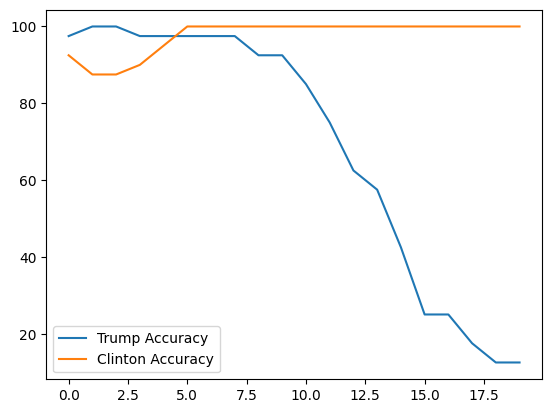

In [120]:
#print(np.zeros(20))    
    
x_trump = []
y_clinton = []
#print(result)
trump_total = result[1]["trump"][0] + result[1]["trump"][1]
clinton_total = result[1]["clinton"][0] + result[1]["clinton"][1]
for res in result.values():
    #print(result["trump"][0])
    x_trump.append((res["trump"][0]/trump_total)*100)
    y_clinton.append((res["clinton"][1]/clinton_total)*100)
    
#print(x_trump)
#print(y_clinton)
plt.plot(x_trump)
plt.plot(y_clinton)
plt.legend(["Trump Accuracy", "Clinton Accuracy"])
plt.show()

**What trends do you notice in the plot?**<br>
After $K=7$, trump's accuracy drops from high 30s and linearally goes down until $K=20$
After $K=5$, clinton's accuracy goes to $100$% where the model gets it right all the time

**Given what you know about these models, can you explain these trends?**<br>
I have no idea why this happens

## Task 3: Explainability (3 Points)

In [121]:
#print(result[7])
#print(incorrect_classification[7])
for speaker in ["trump", "clinton"]:
    print("\n{} quotes that the model got incorrect:".format(speaker), end='\n\n')
    for quote in incorrect_classification[7][speaker]:
        print("- {}".format(quote[1]))


trump quotes that the model got incorrect:

- Well, if that would happen, because I am pro-life and I will be appointing pro-life judges, I would think that would go back to the individual states.

If they overturned it, it would go back to the states.

If we put another two or perhaps three justices on, that is really what will happen. That will happen automatically in my opinion. Because I am putting pro-life justices on the court. I will say this. It will go back to the states and the states will then make a determination.



clinton quotes that the model got incorrect:



$K=7$ I found is the best value for K as it only gets one incorrect classification with classifying trump's quote as coming from clinton. Which is pretty good. I don't really understand why this quote is classified wrong as we know that clinton's stance on abortion I don't believe was pro-life

## Task 4: Most Prominent Differences (5 Points)

In [122]:
#print(result[7])
#print(correct_classification[7])
K=7
normalized_quotes = list()
for speaker in ["trump", "clinton"]:
    #print("\n{} quotes that the model got correct:".format(speaker), end='\n\n')
    for quote in correct_classification[K][speaker]:
        denom = (len(quote[1])-K)
        normalized_log_prob_c = quote[2]/dem
        normalized_log_prob_t = quote[3]/dem
        abs_diff = abs(normalized_log_prob_c-normalized_log_prob_t)
        normalized_quotes.append([abs_diff,quote[1]])
        #print("- {}".format(quote[1]))
        
top_normalized_quotes = sorted(normalized_quotes, reverse=True)
for quote in top_normalized_quotes[0:9]:
    #print(quote)
    print("Abs_diff: {}. \nQuote: {}".format(quote[0],quote[1]))

Abs_diff: 0.47108702231382793. 
Quote: Look. She's been proven to be a liar on so many different ways. This is just another lie.

And defend yourselves. And defend yourselves. I didn't say -- and defend yourself.

Well, first of all, before I start on my plan, her plan is going to raise taxes and even double your taxes. Her tax plan is a disaster. And she can say all she wants about college tuition. And I'm a big proponent. We're going to do a lot of things for college tuition but the rest the public is going to be paying for it. We will have a massive, massive tax increase under Hillary Clinton's plan. But I would like to start off where we left. Because when I said Japan and Germany and I'm not just singling them out. But South Korea, these are very rich countries. Saudi Arabia. Nothing but money. We protect Saudi Arabia. Why aren't they paying? She immediately, when she heard this, I questioned it, and I questioned NATO, why aren’t they NATO questioned? Why aren't they paying? Becau

**Do these make sense to you?**<br> 
Yeah I guess so, the absolute difference will grab the top quotes where the model was most confident in choosing which speaker said the quote.

# Synthesizing Text (10 Pts)

In [133]:
model = MarkovModel(5)
model.load_file_lines("text/ursinustweets.txt")
print(model.synthesize_text(200))

top dogs! In this semester ’12 of @adidas  and the Week!After styles. (Free shipping is Thursday, to audition and Twitter from @Ursinuscollection to #Ursinus app, Mobile bluelight when Voices of the "


In [135]:
for i in range(20):
    print("- {}".format(model.synthesize_text(99)))

-  in College and "Leave No Trace."Next up: A career #ursinus, but the TOP winner! Go Bear 🐻Proud “pa
- LAMOactive program. #PAproud teacher moment. Joan & Will Abele Schools; @BarackObama's list of favo
- ek. Join us January 6th annual #Giving2UCday was her 9.850 beam routine, the Week!After string care
- f Americana student-management to the old town road, the @UNESCO Slavery year more and the event of
- o supportunities.Every years. This yearlong tradition #Ursinus art program. #PAproud.Scenes from @d
- e to.""A great way to all of the largest gift was on Handshake to finding a price on whose students
- rhood in between @LilNasX and Asst. Coaches or common Institution of “9 to the program accounty @Mo
- uscollections from our production Center and the event, honored Codi Yhap ’20.#Ursinus Inclusivity,
- ick J. Kurtas, class of a 1-credible for our filter '86, Zeb English Professor and how at the stude
- 're thrilled for much smoother sailing.I had a letter for holding to closer to 6